In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf



In [172]:
data = pd.read_csv('../input/heart-disease-prediction-using-logistic-regression/framingham.csv')
data.head(10)




,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


## ANALYZING DATA


<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

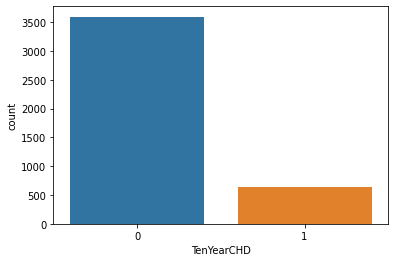

In [173]:
sns.countplot(x="TenYearCHD",data=data)


<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

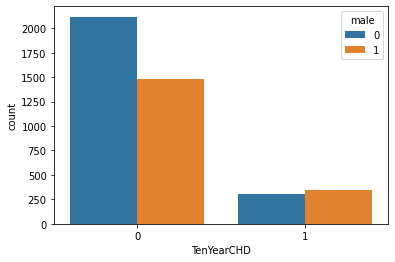

In [174]:
sns.countplot(x="TenYearCHD",hue="male",data=data)

<AxesSubplot:xlabel='currentSmoker', ylabel='cigsPerDay'>

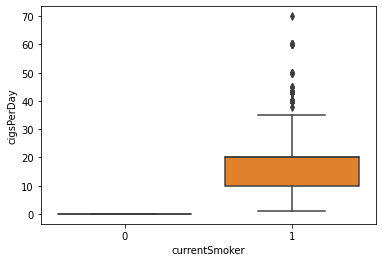

In [175]:
sns.boxplot(x="currentSmoker",y="cigsPerDay",data=data)

## DATA WRANGLING

In [176]:
data.isnull().sum()



male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [177]:
data.dropna(inplace=True)


<AxesSubplot:>

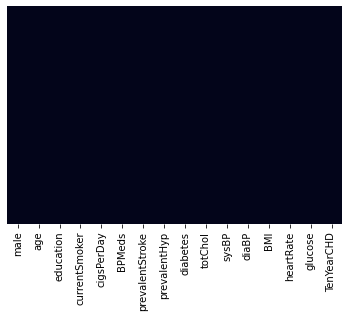

In [178]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [179]:
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3656 non-null   int64  
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.6 KB


## TRAIN_TEST SPLIT OF DATA AND FEATURE SCALING

In [181]:
X = data.iloc[:,:-1].values
y= data.iloc[:,-1].values
print(X)
print(y)

[[  1.    39.     4.   ...  26.97  80.    77.  ]
 [  0.    46.     2.   ...  28.73  95.    76.  ]
 [  1.    48.     1.   ...  25.34  75.    70.  ]
 ...
 [  1.    50.     1.   ...  25.97  66.    86.  ]
 [  1.    51.     3.   ...  19.71  65.    68.  ]
 [  0.    52.     2.   ...  21.47  80.   107.  ]]
[0 0 0 ... 1 0 0]


In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [183]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## TRAINING DATA FOR LOGISTIC REGRESSION

In [184]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression()
classifier1.fit(X_train,y_train)

LogisticRegression()

## ACCURACY CHECK FOR LOGISTIC REGRESSION


In [185]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[772   8]
 [125   9]]
0.8544857768052516


## TRAIN DATA FOR KNN

In [186]:
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier2.fit(X_train, y_train)

KNeighborsClassifier()

## ACCURACY CHECK FOR KNN

In [187]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = classifier2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))


[[764  16]
 [120  14]]
0.8512035010940919


## TRAIN DATA FOR SVM

In [188]:
from sklearn.svm import SVC
classifier3 = SVC(kernel='linear',random_state=0)
classifier3.fit(X_train,y_train)


SVC(kernel='linear', random_state=0)

## ACCURACY CHECK FOR SVM

In [189]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = classifier3.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))


[[780   0]
 [134   0]]
0.8533916849015317


## TRAIN DATA FOR KERNEL SVM

In [190]:
from sklearn.svm import SVC
classifier4=SVC(kernel='rbf',random_state=0)
classifier4.fit(X_train,y_train)

SVC(random_state=0)

## ACCURACY CHECK FOR KERNEL SVM

In [191]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = classifier4.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))


[[778   2]
 [133   1]]
0.8522975929978118


# Using neural network for deeper non linear hypothesis and further classification

## Creating ANN with 2 hidden layers

In [192]:
ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))



## Compiling ANN

In [193]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

## Train ANN

In [194]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
86/86 [==============================] - 1s 1ms/step - loss: 0.5665 - accuracy: 0.7150
Epoch 2/100
86/86 [==============================] - 0s 1ms/step - loss: 0.4705 - accuracy: 0.8431
Epoch 3/100
86/86 [==============================] - 0s 1ms/step - loss: 0.4585 - accuracy: 0.8410
Epoch 4/100
86/86 [==============================] - 0s 1ms/step - loss: 0.4320 - accuracy: 0.8449
Epoch 5/100
86/86 [==============================] - 0s 1ms/step - loss: 0.4196 - accuracy: 0.8462
Epoch 6/100
86/86 [==============================] - 0s 1ms/step - loss: 0.4133 - accuracy: 0.8528
Epoch 7/100
86/86 [==============================] - 0s 1ms/step - loss: 0.4056 - accuracy: 0.8527
Epoch 8/100
86/86 [==============================] - 0s 1ms/step - loss: 0.3950 - accuracy: 0.8524
Epoch 9/100
86/86 [==============================] - 0s 1ms/step - loss: 0.4070 - accuracy: 0.8428
Epoch 10/100
86/86 [==============================] - 0s 1ms/step - loss: 0.4100 - accuracy: 0.8435
Epoch 11/

## predicting test set results

In [195]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


## checking accuracy

In [196]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[767  13]
 [119  15]]


0.8555798687089715